# PCA Implementation and Visualization in Python and Numpy - Lab

## Introduction
In this lab, we shall implement PCA, mainly using Numpy library in Python. Here, our desired outcome of the PCA is to project a feature space on a smaller subspace that preserves the variance of data. We shall look into performing linear data reduction and visualization with PCA. A possible application of this technique would be pattern classification, while reducing the computational costs and the error of parameter estimation by reducing the number of dimensions of our feature space, by extracting a subspace that describes the variance of complete dataset. 

## Objectives
You will be able to :
- Implement Principal Component Analysis using Python and Numpy 
- Generate Multivariate datasets using covariance and mean matrices
- Create 3 dimensional scatter plots using numpy and matplotlib
- Visualize the results of PCA (principal components) in a low dimensional space

## The PCA approach

In this lab, we shall look at following six key stages involved in a PCA experiment. 

1. Start with a dataset consisting of d-dimensional samples. (This does not include the target variable)
2. Compute the mean for every dimension of the whole dataset as a d-dimensional mean vector 
3. Compute the covariance matrix of the whole data set
4. Compute eigenvectors and corresponding eigenvalues 
5. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix 
6. Use the eigenvector matrix to transform the samples onto the new subspace. 

Let's move on and perform our basic step i.e. acquiring data. 

## Stage 1: Creating a Multivariate Dataset

For this experiment, we shall create a 3-dimensional sample i.e. three features. We will generate 40 samples randomly drawn from a multivariate Gaussian distribution. Also, note that the samples come from two different classes, where one half (i.e., 20) samples of our data set belong to class 1 and the other half to class 2.

### Sampling from Normal Distribution

Below , $\mu1$ and $\mu2$ represent the sample means and $\Sigma1$, $\Sigma2$, covariance matrices for two classes. 

$\mu1=\begin{bmatrix}0\\0\\0\end{bmatrix}$, $\mu2=\begin{bmatrix}1\\1\\1\end{bmatrix}$

$\Sigma1 = \begin{bmatrix}1\quad 0\quad 0\\0\quad 1\quad0\\0\quad0\quad1\end{bmatrix}$, $\Sigma2 = \begin{bmatrix}1\quad 0\quad 0\\0\quad 1\quad0\\0\quad0\quad1\end{bmatrix}$

Using above mean and covariance matrices:
- Create mean amd covariance matrices from above data
- Generate total 40 (20x2 for class 1 and 2) 3-dimensional samples randomly drawn from a multivariate Gaussian distribution. 
- Samples should belong to from different classes with a 50/50 distribution.

__Note:__ [Visit this link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multivariate_normal.html) to get an idea on sampling from a multivariate gaussian distribution using given covariance matrix and feature means. Use `numpy.random.multivariate_normal(mean, cov_matrix, num_samples)` as described in the link. 


In [50]:
import numpy as np

class_1 = np.random.multivariate_normal([0,0,0], cov=np.identity(3), size=20)
class_2 = np.random.multivariate_normal([1,1,1], cov=np.identity(3), size=20)
class_1

array([[ 0.02274774,  0.75673546, -2.29908057],
       [ 0.98757439, -0.70803832,  1.48186794],
       [-0.37744809,  0.34693182, -0.87766044],
       [ 0.5675993 , -0.59846581, -2.33398185],
       [-1.94102634,  0.71857321,  0.16307055],
       [-1.2734897 ,  0.0196048 ,  0.97266709],
       [-1.04585218, -0.30694874, -0.79891571],
       [ 0.84828258,  0.9079887 ,  1.22831587],
       [ 0.78554554, -1.15930075, -0.66251633],
       [ 0.70038164, -0.43565354, -0.98669537],
       [ 0.29256954, -0.27724142,  0.14943242],
       [-1.36422409,  0.73438148, -0.2353993 ],
       [ 0.38453628, -0.77222265,  0.34183994],
       [ 1.29312324, -1.07526084, -0.2385188 ],
       [-1.74686617,  1.5945189 ,  0.16225613],
       [-0.96512165,  0.62777477,  0.6088313 ],
       [ 0.65276191,  0.75702277, -0.86898262],
       [ 1.01396024,  0.01596164, -0.66783835],
       [-0.39507699,  0.18387503, -1.57869991],
       [ 0.04489922,  0.12342046,  0.40478896]])

###  Visualize the Dataset

We can now plot both of these samples on a 3d scatter matrix showing data along x, y and z dimension. [Here is a reference plot with accompanying code](https://matplotlib.org/2.1.1/gallery/mplot3d/scatter3d.html) to help you get going. USe `Axes3D` for defining data in a 3 dimensional space. 

- Create a 3d scatter plot showing both classes

In [51]:
class_1[:,0]

array([ 0.02274774,  0.98757439, -0.37744809,  0.5675993 , -1.94102634,
       -1.2734897 , -1.04585218,  0.84828258,  0.78554554,  0.70038164,
        0.29256954, -1.36422409,  0.38453628,  1.29312324, -1.74686617,
       -0.96512165,  0.65276191,  1.01396024, -0.39507699,  0.04489922])

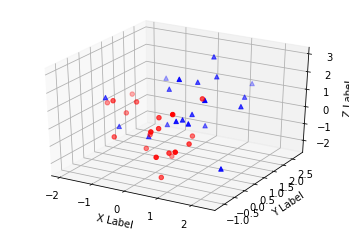

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = class_1[:,0]
y1 = class_1[:,1]
z1 = class_1[:,2]
ax.scatter(x1, y1, z1, c='r', marker='o')

x2 = class_2[:,0]
y2 = class_2[:,1]
z2 = class_2[:,2]
ax.scatter(x2, y2, z2, c='b', marker='^')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### Combine Classes into a single dataset
As PCA is an unsupervised learning algorithm i.e. it doesn't require a target (or label) to learn the variance of features, So we can ignore the class labels and combine both datasets. 
- Concatenate feature sets for both classes into a single dataset. (Remember to perform the concatenation along the rows, as we dont want to add new features)

In [53]:
# your code here
samples = np.concatenate([class_1, class_2])
samples.shape

(40, 3)

Great, so now we have our final dataset, ready for analysis. This was our Stage 1 of PCA. Let's move on the stage 2. 

## Stage 2: Computing the 3-dimensional Mean Vector

This is a simple one. For the dataset we have created above, we need to calculate the mean of each feature and save it as a vector. 

- Calculate the mean of all three dimensions in `samples` and store as a vector of three values in the correct order. 
- Show the mean vector in the output 

In [54]:
# your code here
mean_vec = samples.mean(axis=0)
mean_vec

array([0.29374836, 0.33393539, 0.35330941])

## Stage 3: Computing Covariance Matrix 

The next step is to calculate the covariance matrix for our `samples` data using the in-built `numpy.cov()` function. 
- Calculate covariance matrix for the dataset by passing all three dimensions of data to `np.cov()`

In [61]:
samples

array([[ 2.27477410e-02,  7.56735457e-01, -2.29908057e+00],
       [ 9.87574393e-01, -7.08038317e-01,  1.48186794e+00],
       [-3.77448091e-01,  3.46931816e-01, -8.77660439e-01],
       [ 5.67599296e-01, -5.98465806e-01, -2.33398185e+00],
       [-1.94102634e+00,  7.18573213e-01,  1.63070546e-01],
       [-1.27348970e+00,  1.96047952e-02,  9.72667086e-01],
       [-1.04585218e+00, -3.06948739e-01, -7.98915709e-01],
       [ 8.48282584e-01,  9.07988696e-01,  1.22831587e+00],
       [ 7.85545536e-01, -1.15930075e+00, -6.62516334e-01],
       [ 7.00381644e-01, -4.35653539e-01, -9.86695371e-01],
       [ 2.92569538e-01, -2.77241418e-01,  1.49432422e-01],
       [-1.36422409e+00,  7.34381483e-01, -2.35399304e-01],
       [ 3.84536284e-01, -7.72222653e-01,  3.41839937e-01],
       [ 1.29312324e+00, -1.07526084e+00, -2.38518797e-01],
       [-1.74686617e+00,  1.59451890e+00,  1.62256130e-01],
       [-9.65121651e-01,  6.27774775e-01,  6.08831303e-01],
       [ 6.52761913e-01,  7.57022767e-01

In [63]:
print(samples[0,:])    # single row, all columns
samples[:,0]           # single column, all rows

[ 0.02274774  0.75673546 -2.29908057]


array([ 0.02274774,  0.98757439, -0.37744809,  0.5675993 , -1.94102634,
       -1.2734897 , -1.04585218,  0.84828258,  0.78554554,  0.70038164,
        0.29256954, -1.36422409,  0.38453628,  1.29312324, -1.74686617,
       -0.96512165,  0.65276191,  1.01396024, -0.39507699,  0.04489922,
        0.88787864,  1.22107266,  0.87786488, -1.32718561,  0.65481698,
        2.37038406,  1.47529415,  0.60450228,  0.07675565,  1.92340325,
       -0.09504921,  1.62914098,  0.60760782, -0.89505537,  0.09458772,
        0.91445639, -0.80160452,  0.89820997,  1.17861568,  0.96936174])

In [87]:
# your code here
cov_matrix = np.cov([samples[:,0], samples[:,1], samples[:,2]], rowvar=True)
cov_matrix

array([[ 1.05703423, -0.08019833,  0.15839568],
       [-0.08019833,  0.7728965 ,  0.4130501 ],
       [ 0.15839568,  0.4130501 ,  1.50404546]])

## Stage 4: Perform Eigen-Decomposition

We shall now perform the eigen-decomposition of the covariance matrix computed in the last stage. We shall make use of `numpy.linalg.eig(cov)` as seen earlier. 

- Perform Eigen-Decomposition to calculate eigenvectors and eigenvalues 

In [88]:
# Your code here 

eigen_value, eigen_vectors = np.linalg.eig(cov_matrix)
print(eigen_value)
eigen_vectors

# Eigen values: array([2.30703911, 1.14520348, 0.81675298]),
# Eigen Vectors: [[-0.67430892, -0.64746073,  0.35510854],
#                 [-0.53366192,  0.09488555, -0.84035807],
#                 [-0.51040418,  0.75616885,  0.40950731]]))


[0.54851542 1.07583861 1.70962216]


array([[-0.26743932, -0.94796452,  0.17274106],
       [-0.86753933,  0.3149026 ,  0.38498293],
       [ 0.41934677,  0.04690009,  0.90661385]])

Testing for the following section:

In [95]:
cov_matrix.dot(eigen_vectors[:, 0])

array([-0.14669459, -0.4758587 ,  0.23001817])

In [96]:
eigen_value[0] * eigen_vectors[:, 0]

array([-0.14669459, -0.4758587 ,  0.23001817])

### Checking the eigenvector-eigenvalue calculation
Let us quickly check that the eigenvector-eigenvalue calculation is correct and satisfy the equation

$$\Sigma v = \lambda v$$

where sigma is the covariance matrix , v is the eigenvector and lambda is the eigen value. As the value may not be __exactly the same__ on both sides of the equation, we will use `np.testing.assert_array_almost_equal()` function to set a desired level acceptance for equality. [Visit here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.testing.assert_array_almost_equal.html) to learn more about this function. 

- Check for the calculated eigenvectors and eigenvalues, if the R.H.S and L.H.S of above equation are __almost equal__. 

psuedo-code:
do this for each vector of the eigen vectors array
```
cov.dot(eig_row_j) == (eig_value_j)*(eig_row_j)
```

In [100]:
sum([x*x for x in eigen_vectors[0]])

0.9999999999999996

In [101]:
sum([x*x for x in eigen_vectors[:,0]])

1.0

In [102]:
eigen_vectors

array([[-0.26743932, -0.94796452,  0.17274106],
       [-0.86753933,  0.3149026 ,  0.38498293],
       [ 0.41934677,  0.04690009,  0.90661385]])

In [94]:
# your code here
for i, _ in enumerate(eigen_vectors[0]):
    column = eigen_vectors[:,i]
    left_side = cov_matrix.dot(column)
    right_side = eigen_value[i] * (column)
    np.testing.assert_array_almost_equal(left_side, right_side)
# No output - no exception raised . We are good to move forward

### Visualize Eigenvectors - Optional 

This step is not necessary for PCA but it is a good idea to visualize the eigen vectors and visually see their direction. Here is a code for visualizing the eigen vectors along with our data. 

- Uncomment to run below cell, once you have above stages fulfilled

In [106]:
mu_x, mu_y, mu_z = mean_vec

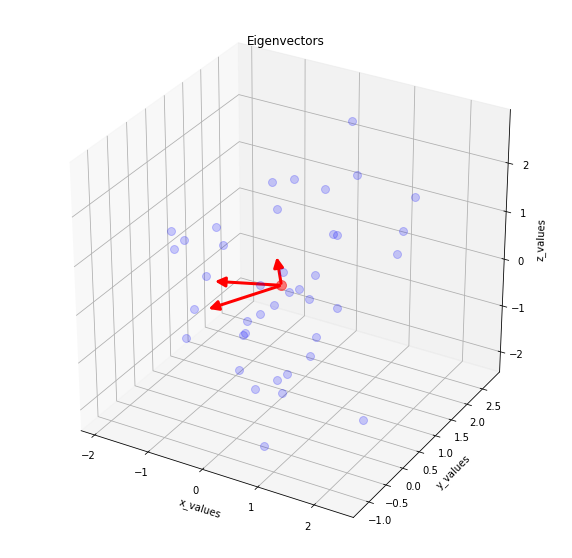

In [112]:
# Uncomment and run below to visualize your principal components 

%matplotlib inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(samples[:,0], samples[:,1], samples[:,2], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([mu_x], [mu_y], [mu_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([mu_x, v[0]], [mu_y, v[1]], [mu_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

## Stage 5: Sort and Select `k` Largest EigenVectors

The eigenvectors can only define the directions of the new axis, since they have all the same unit length 1. To decide which eigenvectors we want to keep in our lower dimensional space, we consider the eigenvalues. The eigenvectors with the lowest eigenvalues carry the least information about the distribution of the data (and vice versa), and those are the ones we want to drop.

- Rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top k eigenvectors.

In [108]:
eigen_value, eigen_vectors

(array([0.54851542, 1.07583861, 1.70962216]),
 array([[-0.26743932, -0.94796452,  0.17274106],
        [-0.86753933,  0.3149026 ,  0.38498293],
        [ 0.41934677,  0.04690009,  0.90661385]]))

### `dxk` dimensional matrix

For our simple example, where we are reducing a 3-dimensional feature space to a 2-dimensional feature subspace, we are combining the two eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix (d is the total number of dimensions i.e. 3 and k is the number of new dimensions used here i.e. 2).
- Use `np.reshape()` and `np.hstack` to reshape and combine eigenvectors having top 2 eigenvalues

In [10]:
# Your code here 

Matrix:
 [[-0.67430892 -0.64746073]
 [-0.53366192  0.09488555]
 [-0.51040418  0.75616885]]


## Stage 6: Transform Samples to Low-Dimensional Subspace

In the last step, we shall use the matrix WW that we just computed to transform our samples onto the new subspace by dot multiplying it with original samples set. 
- Take a dot product of matrix calculated above with complete feature set `samples`.


In [11]:
# Your code here 

,0,1
0,0.109119,0.116520
1,1.112799,-0.986342
2,1.475209,0.375554
3,0.245209,0.556289
4,-0.395697,-0.834696


### Visualize low dimensional data
SO here we see that dataset has been transformed into a low dimensional space. Let's try to visualize this dataset with respect to the class distribution we initially started off with. Remember that out of 40 samples, first 20 samples belong to class A and last 20 belong to class b. 

- Draw a histogram for class 1 [0:20] and class 2 [20:40] from the transformed dataset
- Use markers for both classes and label accordingly

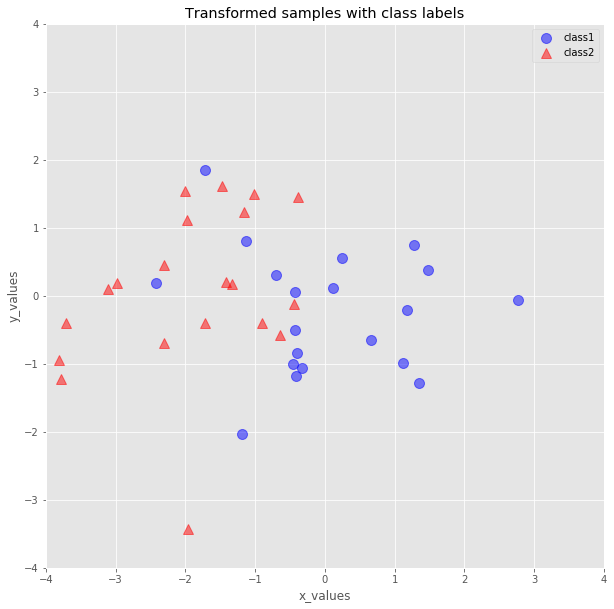

In [12]:
# Your code here 

Here it is , we have successfully reduced the dimensions of the given dataset from 3 to 2, along with visualizing the data at every step. Next we shall look at performing PCA in sci-kit learn with some real life datasets for a number of applications. 

## Summary 

In this lab we looked at implementing PCA in Python and Numpy. We looked at different stages that are involved in running a PCA analysis in detail. We also used 3D and 2D visualizations along the way to get a better intuition of the whole process. Next we shall see how to repeat this exercise in `sk-learn`.